<a href="https://colab.research.google.com/github/Martindelosrios/BATMAN/blob/master/EXAMPLES/Example_1_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example 1

Here we will learn how to use BATMAN for estimating the parameter posteriors given data from XENONnT experiment

# First let's install BATMAN from https://github.com/Martindelosrios/BATMAN

In [1]:
!git clone https://github.com/Martindelosrios/BATMAN.git

Cloning into 'BATMAN'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 311 (delta 25), reused 33 (delta 15), pack-reused 263
Receiving objects: 100% (311/311), 47.05 MiB | 21.40 MiB/s, done.
Resolving deltas: 100% (175/175), done.


In [2]:
!pip install BATMAN/

Processing ./BATMAN
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 11.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5

# Let's load the needed packages and data

In [3]:
from BATMAN import batman, models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import pkg_resources
from importlib_resources import files

from scipy.integrate import trapezoid
from matplotlib.lines import Line2D

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Using GPU


INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /usr/local/lib/python3.10/dist-packages/BATMAN/dataset/O1_rate.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from checkpoint at /usr/local/lib/python3.10/dist-packages/BATMAN/dataset/O1_rate.ckpt


Testing: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    -1.0076120105385222    │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /usr/local/lib/python3.10/dist-packages/BATMAN/dataset/O1_drate_epoch=22_val_loss=-1.51_train_loss=-1.42.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from checkpoint at /usr/local/lib/python3.10/dist-packages/BATMAN/dataset/O1_drate_epoch=22_val_loss=-1.51_train_loss=-1.42.ckpt


Testing: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/BATMAN/models.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(a["x"])


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    -1.3329405664183682    │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /usr/local/lib/python3.10/dist-packages/BATMAN/dataset/O1_s1s2_epoch=4_val_loss=-1.59_train_loss=-1.79-v2.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from checkpoint at /usr/local/lib/python3.10/dist-packages/BATMAN/dataset/O1_s1s2_epoch=4_val_loss=-1.59_train_loss=-1.79-v2.ckpt


Testing: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/BATMAN/models.py:175: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(a["x"])


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    -1.4515358943170253    │
└───────────────────────────┴───────────────────────────┘

In [4]:
# Some fancy colour configuration
color_rate = "#d55e00"
color_drate = "#0072b2"
color_s1s2 = "#009e73"

In [6]:
# Now let's load the dataset with XENON nT simulations.
#  This data was create with .....

ref = files("BATMAN") / "dataset/"
DATA_PATH = str(ref)
with h5py.File(DATA_PATH + "/testset.h5", "r") as data:
  x_norm_rate  = data['x_norm_rate'][()]
  x_norm_drate = data['x_norm_drate'][()]
  x_norm_s1s2  = data['x_norm_s1s2'][()]
  pars_norm    = data['pars_norm'][()]
  pars_min = data.attrs["pars_min"]
  pars_max = data.attrs["pars_max"]
  x_min_rate = data.attrs["x_min_rate"]
  x_max_rate = data.attrs["x_max_rate"]
  x_min_drate = data.attrs["x_min_drate"]
  x_max_drate = data.attrs["x_max_drate"]


# Let's play with BATMAN!

In [16]:
# Let's pick some random synthetic observation from the simulated dataset.

i = np.random.randint(len(pars_norm))
print('nobs = ' + str(i))

pars_true   = pars_norm[i,:]
x_obs_rate  = x_norm_rate[i,:]
x_obs_drate = x_norm_drate[i,:]
x_obs_s1s2  = x_norm_s1s2[i,:].reshape(1,96,96)

M_DM_real = 10**(pars_true[0] * (pars_max[0] - pars_min[0]) + pars_min[0])
print('M_DM = {:.2f} GeV'.format(M_DM_real))
sigma_real = 10**(pars_true[1] * (pars_max[1] - pars_min[1]) + pars_min[1])
print('sigma = {:.3e} cm2'.format(sigma_real))
theta_real = (pars_true[2] * (pars_max[2] - pars_min[2]) + pars_min[2])
print('theta = {:.3} '.format(theta_real))

nobs = 219
M_DM = 464.79 GeV
sigma = 5.855e-46 cm2
theta = 0.991 


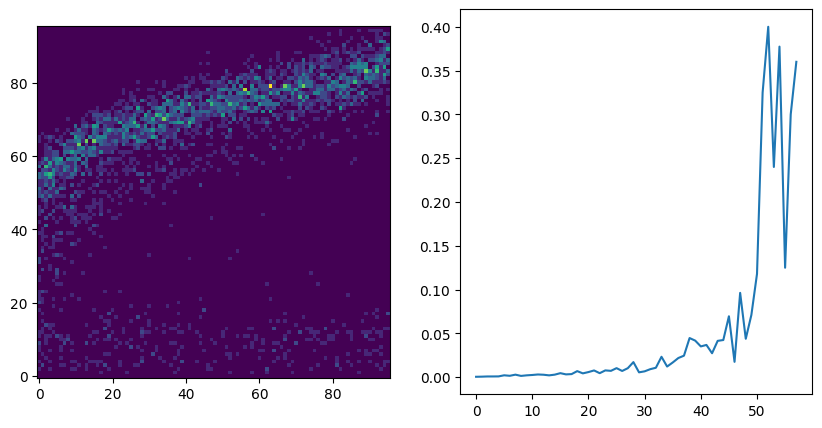

In [21]:
# Let's see how it looks

fig,ax = plt.subplots(1,2, figsize = (10,5))

ax[0].imshow(x_obs_s1s2.T, origin = 'lower')

ax[1].plot(x_obs_drate)

Now let's check the available models...

As you can see, when doing print(model) you have some information about the pre-trained model

In [28]:
# Now let's check the available models...

print('--------------------------------')
print('For analyzing s1s2 images we have:')

print(models.XENONnT_O1_s1s2)

print('--------------------------------')
print('For analyzing differential rate data we have:')

print(models.XENONnT_O1_drate)

print('--------------------------------')
print('For analyzing total rate data we have:')

print(models.XENONnT_O1_rate)

--------------------------------
For analyzing s1s2 images we have:

This model was trained with simulations of s1-s2 data expected in XENON nT with
an eft O1 dark matter model, varying the dark matter mass, the
scattering amplitude and the isospin angle in the ranges [], [],
and [] respectively.

You can extract the 1D marginal posteriors of each parameter or the 2D
marginal posteriors of combination of parameters.

--------------------------------
For analyzing differential rate data we have:

This model was trained with simulations of differential rate expected in XENON nT with
an eft O1 dark matter model, varying the dark matter mass, the
scattering amplitude and the isospin angle in the ranges [], [],
and [] respectively.

You can extract the 1D marginal posteriors of each parameter or the 2D
marginal posteriors of combination of parameters.

--------------------------------
For analyzing total rate data we have:

This model was trained with simulations of the total rate expected 

In [29]:
# Let's sample the parameters from a flat prior

pars_prior = np.random.uniform(low = 0, high = 1, size = (100_000, 3))

# As you can see, you need to specify the prior in the normalized space!
# This will be re-normalized to the corresponding physical values internally.

In [30]:
# Let's analyze the each type of data with the corresponding model

# The first argument is a list with the observation that will be analyzed.
# The second argument is the sample of paramters that will be paired with the observations.
# The third argument is a list with the models that will be used.

# The first element of the observation list will be analyzed with the first element of the model list, and so on.

logratios1D, logratios2D = batman.ratio_estimation([x_obs_rate, x_obs_drate, x_obs_s1s2], pars_prior, [models.XENONnT_O1_rate, models.XENONnT_O1_drate, models.XENONnT_O1_s1s2])

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


0


Predicting: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:173: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


1


Predicting: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/BATMAN/models.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(a["x"])
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


2


Predicting: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/BATMAN/models.py:175: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(a["x"])


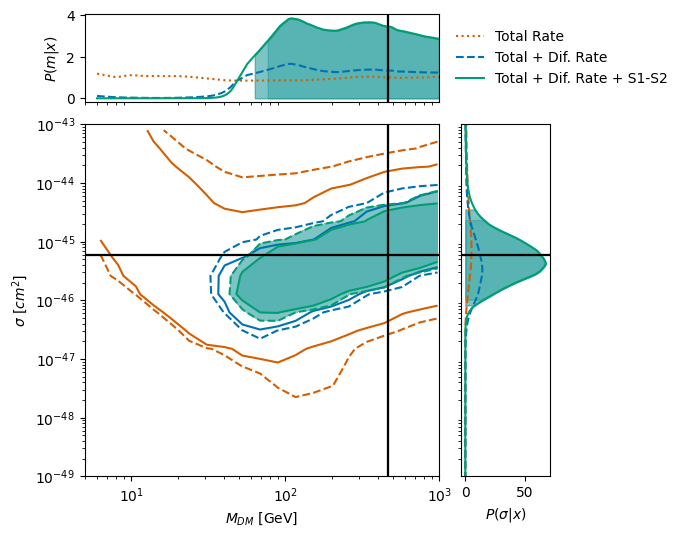

In [32]:
# Now let's make some plots to see the results


fig,ax = plt.subplots(2,2, figsize = (6,6),
                      gridspec_kw={'height_ratios': [0.5, 2], 'width_ratios':[2,0.5]})

plt.subplots_adjust(hspace = 0.1, wspace = 0.1)

batman.plot1d(ax[0,0], [logratios1D[0]], pars_prior, pars_true, par = 0, fill = False, linestyle = ':', color = color_rate)
batman.plot1d(ax[0,0], [logratios1D[0], logratios1D[1]], pars_prior, pars_true, par = 0, fill = False, linestyle = '--', color = color_drate)
batman.plot1d(ax[0,0], logratios1D, pars_prior, pars_true, par = 0, fill = True, linestyle = 'solid', color = color_s1s2)

batman.plot2d(ax[1,0], [logratios2D[0]], pars_prior, pars_true, fill = False, line = True, linestyle = ':', color = color_rate)
batman.plot2d(ax[1,0], [logratios2D[0],logratios2D[1]], pars_prior, pars_true, fill = False, line = True, linestyle = '--', color = color_drate)
batman.plot2d(ax[1,0], logratios2D, pars_prior, pars_true, fill = True, line = True, linestyle = 'solid', color = color_s1s2)

batman.plot1d(ax[1,1], [logratios1D[2]], pars_prior, pars_true, par = 1, flip = True, fill = False, linestyle = '--', color = color_rate)
batman.plot1d(ax[1,1], [logratios1D[0], logratios1D[1]], pars_prior, pars_true, par = 1, flip = True, fill = False, linestyle = '--', color = color_drate)
batman.plot1d(ax[1,1], logratios1D, pars_prior, pars_true, par = 1, flip = True, fill = True, linestyle = 'solid', color = color_s1s2)

ax[0,0].set_xlim(5,1e3)
ax[1,0].set_xlim(5,1e3)
ax[1,0].set_ylim(1e-49,1e-43)
ax[1,1].set_ylim(1e-49,1e-43)

ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('$P(m|x)$')
ax[0,0].set_xticks([])
ax[1,1].set_ylabel('')
ax[1,1].set_yticks([])
ax[1,1].set_xlabel('$P(\sigma|x)$')

custom_lines = []
labels = ['Total Rate', 'Total + Dif. Rate', 'Total + Dif. Rate + S1-S2']
markers = [':','--', 'solid']
colors = [color_rate, color_drate, color_s1s2]
for i in range(3):
    custom_lines.append( Line2D([0],[0], linestyle = markers[i], color = colors[i],
            label = labels[i]) )

ax[0,1].axis('off')
ax[0,1].legend(handles = custom_lines, frameon = False, loc = 'lower left', bbox_to_anchor=(-0.2,0.05))